In [1]:
# Import all necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.20.0


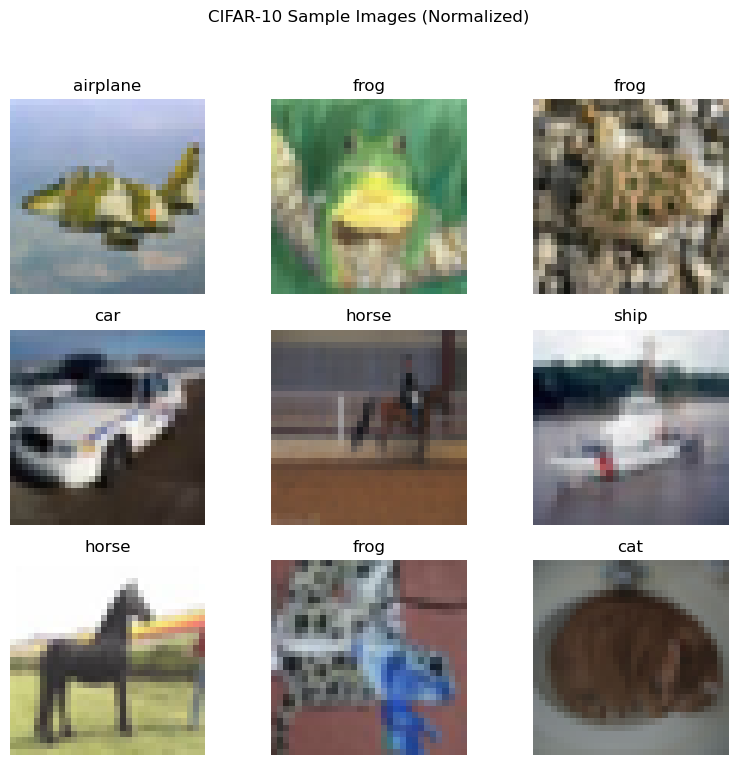

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Define the 10 class names
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values (0-255) to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# --- Dataset Visualization (for report) ---
plt.figure(figsize=(8,8))
for i in range(9):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[idx])
    # y_train is a 2D array, we use [0] to get the scalar class index
    plt.title(class_names[int(y_train[idx][0])])
    plt.axis('off')

plt.suptitle("CIFAR-10 Sample Images (Normalized)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [3]:
# --- Model Definition ---
model = models.Sequential([
    # Input: 32x32x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'), # Third Conv layer

    # Classification Head
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes output
])

# Display model summary (for report/presentation)
print("--- CNN Model Summary ---")
model.summary()

# --- Model Compilation ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Model Training (This will take a few minutes) ---
print("\nStarting model training for 10 epochs...")
start_time = time.time()
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))
end_time = time.time()
print(f"\nTraining completed in {end_time - start_time:.2f} seconds.")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- CNN Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training for 10 epochs...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 0.4372 - loss: 1.5437 - val_accuracy: 0.5317 - val_loss: 1.2835
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.5763 - loss: 1.1869 - val_accuracy: 0.5960 - val_loss: 1.1483
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6335 - loss: 1.0433 - val_accuracy: 0.6401 - val_loss: 1.0235
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6651 - loss: 0.9528 - val_accuracy: 0.6641 - val_loss: 0.9658
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6940 - loss: 0.8742 - val_accuracy: 0.6859 - val_loss: 0.9168
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7144 - loss: 0.8162 - val_accuracy: 0.6892 - val_loss: 0.9015
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7323 - loss: 0.7653 - val_accuracy: 0.6875 - val_loss: 0.9153
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━

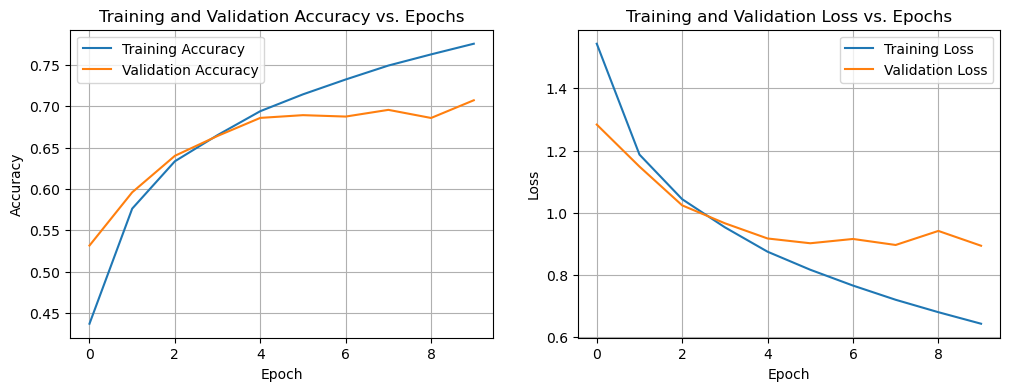

313/313 - 5s - 15ms/step - accuracy: 0.7072 - loss: 0.8934

Final Test Accuracy: 70.72%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

--- Classification Report (Averaged Metrics for Report) ---
Precision (avg): 0.71
Recall (avg): 0.71
F1-score (avg): 0.70


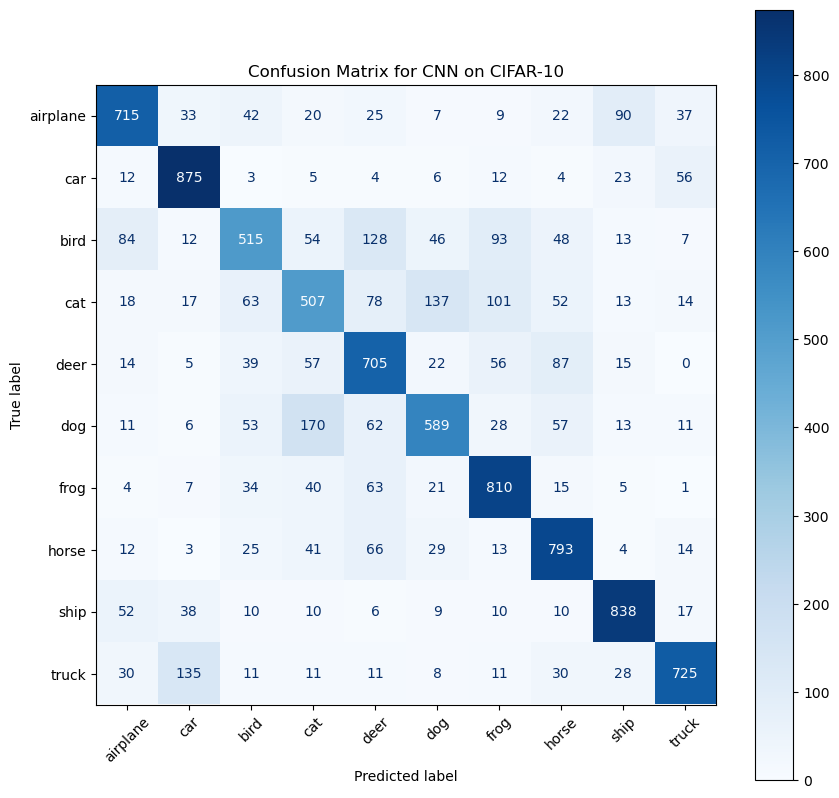

In [4]:
from sklearn.metrics import classification_report

# --- A. Accuracy and Loss Plot (for Presentation) ---
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# --- B. Final Evaluation Metrics ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")

# Generate predictions for the confusion matrix
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Get the class with the highest probability

# Calculate Classification Report for F1/Precision/Recall values
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# --- Extract averaged metrics for the Report ---
# Note: Use 'weighted avg' for multi-class reports
print("\n--- Classification Report (Averaged Metrics for Report) ---")
print(f"Precision (avg): {report_dict['weighted avg']['precision']:.2f}")
print(f"Recall (avg): {report_dict['weighted avg']['recall']:.2f}")
print(f"F1-score (avg): {report_dict['weighted avg']['f1-score']:.2f}")


# --- C. Confusion Matrix (for Report and Presentation) ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap="Blues", xticks_rotation=45, ax=ax)
plt.title("Confusion Matrix for CNN on CIFAR-10")
plt.show()